## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [164]:
# Your code here
df_raw = pd.read_csv('/Users/Above_Aero/Desktop/mapdataall.csv')
show(df_raw)

**Q1** How many variables and observations?

In [35]:
# Your code here
#Defining the number of variables and observations using the shape method.
obs = df_raw.shape[0]
vars = df_raw.shape[1]
#Assigning to a list.
obs_vars = [obs, vars]
#Turning the list into a DF and transposing.
pd_obs_vars = pd.DataFrame(obs_vars).transpose()
#Setting column names
pd_obs_vars.rename(columns = {0:'Observations',1:'Variables'}, inplace = True)
pd_obs_vars

,Observations,Variables
0,2736,23


**Q2** How many different incident types are there?

In [32]:
# Your code here
var = 'incident_type'
pd.DataFrame(df_raw[var].unique()).transpose()

,0,1,2,3
0,NaN,Wildfire,Flood,Fire


**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

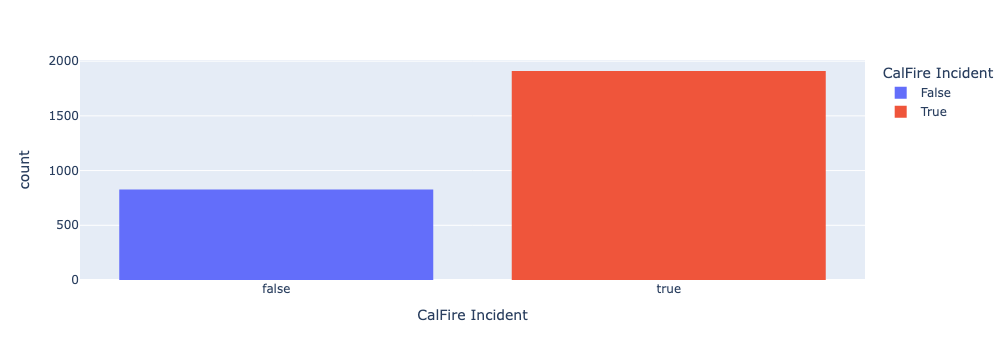

In [134]:
#df_raw.columns
fig = px.histogram(df_raw, 
                   x = 'calfire_incident',
                   color = 'calfire_incident',
                   labels = {'calfire_incident':'CalFire Incident'})
                                     
fig.show()

In [209]:
#df_raw['incident_acres_burned'].isna().sum()

#AverageAcre = df_raw['incident_acres_burned'].mean(axis=0)
#df_raw['incident_acres_burned'].replace(AverageAcre, 0, inplace=True)

mask = (df_raw['incident_acres_burned'].astype(float) > 100000)
df_calfire = df_raw[mask]
over100k = df_calfire['incident_acres_burned'].count()
print('There are',over100k,'incidents over 100,000 acres.')

max_acres = df_raw['incident_acres_burned'].max()
print('The max acres is',max_acres)

There are 20 incidents over 100,000 acres.
The max acres is 1032648.0


/var/folders/6f/gxpbyqcd6qb7v_30_myk9r5m0000gp/T/ipykernel_868/1715592537.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

                                average_incident_acres_burned
incident_dateonly_extinguished                               
2009.0                                             122.000000
2013.0                                            3528.262411
2014.0                                            3907.657895
2015.0                                            4183.858586
2016.0                                            2906.668831
2017.0                                            4474.000000
2018.0                                            4241.708333
2019.0                                            2736.104536
2020.0                                           11911.606796
2021.0                                           14580.229299
2022.0                                            1603.200000
2023.0                                            3379.061224
2024.0                                            1010.295858


/var/folders/6f/gxpbyqcd6qb7v_30_myk9r5m0000gp/T/ipykernel_868/1126927469.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6f/gxpbyqcd6qb7v_30_myk9r5m0000gp/T/ipykernel_868/1126927469.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



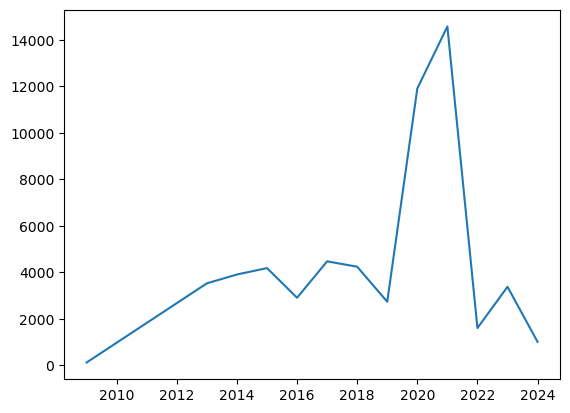

In [214]:
# Extra Code
#print(df_raw.columns)
var1 = 'incident_dateonly_extinguished'
var2 = 'incident_acres_burned'
df_qextra = df_raw[[var1, var2]]

#df_qextra.head()
df_qextra[var1] = pd.to_datetime(df_qextra[var1], errors='coerce')
df_qextra[var1] = df_qextra[var1].dt.year

df_qextra = df_qextra[[var1,var2]].groupby(var1).mean()
print(df_qextra.rename(columns = {'incident_acres_burned':'average_incident_acres_burned'}, inplace = False))
plt.plot(df_qextra)
plt.show()

## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [34]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [11]:
# Your code here


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [12]:
# Your code here


## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.